Note: you may need to restart the kernel to use updated packages.
(16365, 2)
<bound method NDFrame.head of             Date        Close
0     1957-03-04   626.725613
1     1957-03-05   626.720007
2     1957-03-06   626.564401
3     1957-03-07   626.378795
4     1957-03-08   626.073189
...          ...          ...
16360 2022-02-28  2247.290173
16361 2022-03-01  2179.444567
16362 2022-03-02  2259.558961
16363 2022-03-03  2236.343355
16364 2022-03-04  2201.557748

[16365 rows x 2 columns]>
(16365, 2)


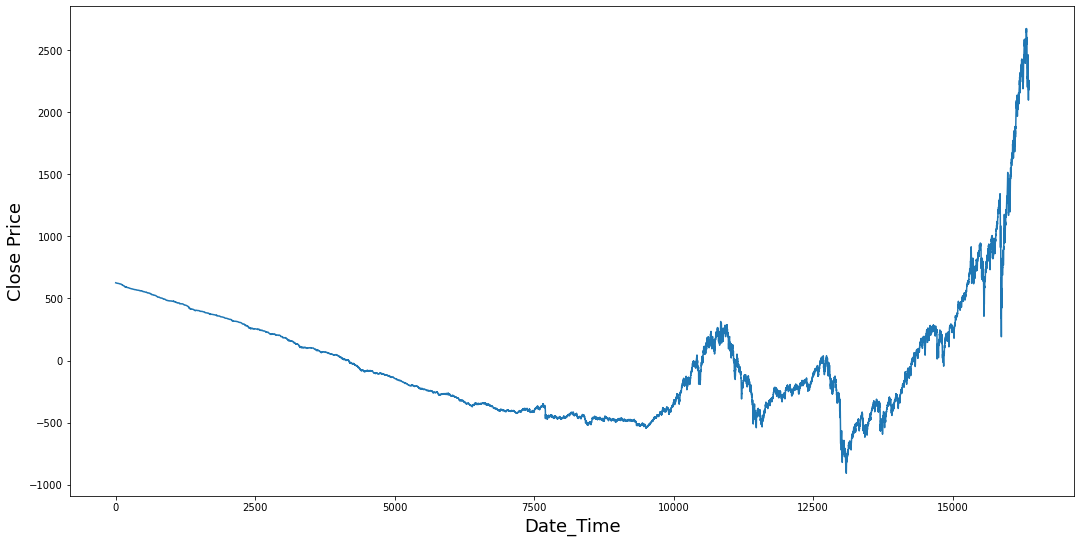

train shape (5565,)
valid shape (5400,)
test shape (5400,)
(5565, 1)
(5400, 1)
(5400, 1)


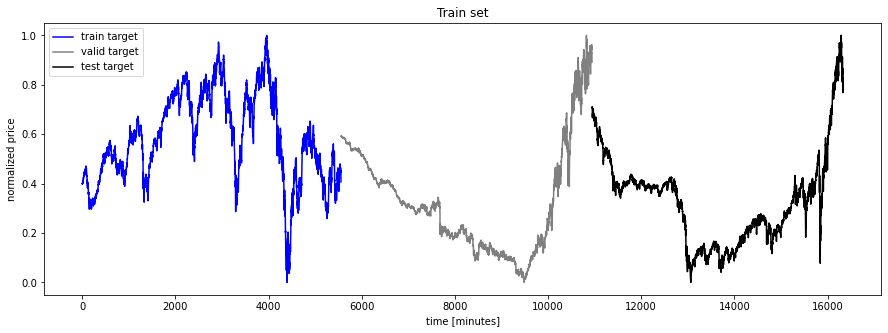

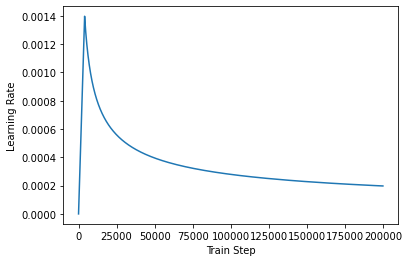

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 10, 1)]      0           []                               
                                                                                                  
 bidirectional (Bidirectional)  (None, 10, 256)      133120      ['input_1[0][0]']                
                                                                                                  
 bidirectional_1 (Bidirectional  (None, 10, 128)     164352      ['bidirectional[0][0]']          
 )                                                                                                
                                                                                                  
 dense (Dense)                  (None, 10, 256)      32768       ['bidirectional_1[0][0]']    

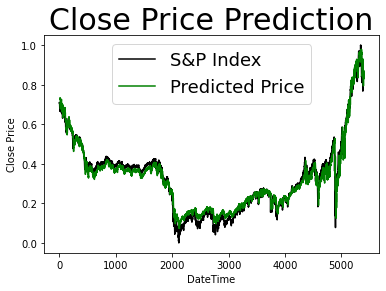

0.0005435950038408764


In [1]:
%run Prediction_032322.ipynb

In [2]:
# Import necessary python Libraries
import os
import numpy as np
import pandas as pd
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import SCORERS
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.calibration import CalibratedClassifierCV

from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.pipeline import Pipeline
from sklearn.ensemble import VotingClassifier

from sklearn.base import BaseEstimator, RegressorMixin

from keras.callbacks import ModelCheckpoint
from matplotlib import pyplot
from keras.models import load_model

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [3]:
multi_head.fit(np.squeeze(X_train), np.squeeze(y_train))

174/174 [==============================] - 7s 20ms/step - loss: 2.1872e-04


In [4]:
model_svr = SVR(kernel = 'rbf')
model_svr.fit(np.squeeze(X_train), np.squeeze(y_train))

SVR()

In [5]:
y_pred_svr = model_svr.predict(np.squeeze(X_test))

In [6]:
print(y_pred_svr)

[0.67881538 0.67829902 0.67718107 ... 0.75993594 0.76143269 0.76280019]


In [7]:
score_svr = model_svr.score(np.squeeze(X_test),np.squeeze(y_test))
print("R-squared:", score_svr)
mse_svr = mean_squared_error(np.squeeze(y_test), y_pred_svr)
print("MSE:",mse_svr)

R-squared: 0.9769892816168464
MSE: 0.0007959239245743244


In [8]:
model_dtr = DecisionTreeRegressor(random_state=1)
model_dtr.fit(np.squeeze(X_train), np.squeeze(y_train))

DecisionTreeRegressor(random_state=1)

In [9]:
y_pred_dtr = model_dtr.predict(np.squeeze(X_test))

In [10]:
print(y_pred_dtr)

[0.71509141 0.69953455 0.71030728 ... 0.77722668 0.85250208 0.82106379]


In [11]:
score_dtr = model_dtr.score(np.squeeze(X_test),np.squeeze(y_test))
print("R-squared:", score_dtr)
mse_dtr = mean_squared_error(np.squeeze(y_test), y_pred_dtr)
print("MSE:", mse_dtr )

R-squared: 0.9917598260102305
MSE: 0.0002850215934985423


In [12]:
model_gbr = GradientBoostingRegressor(random_state=1)

In [13]:
model_gbr.fit(np.squeeze(X_train), np.squeeze(y_train))

GradientBoostingRegressor(random_state=1)

In [14]:
y_pred_gbr = model_gbr.predict(np.squeeze(X_test))
print(y_pred_gbr)

[0.71005273 0.71005273 0.70665568 ... 0.80048757 0.82968456 0.82044333]


In [15]:
score_gbr = model_gbr.score(np.squeeze(X_test),np.squeeze(y_test))
print("R-squared:", score_gbr)
mse_gbr = mean_squared_error(np.squeeze(y_test), y_pred_gbr)
print("MSE:", mse_gbr)

R-squared: 0.9971015379559824
MSE: 0.0001002556828905051


In [16]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [17]:
model_lstm = Sequential()
model_lstm.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model_lstm.add(Dropout(0.2))

model_lstm.add(LSTM(units = 50, return_sequences = True))
model_lstm.add(Dropout(0.2))

model_lstm.add(LSTM(units = 50, return_sequences = True))
model_lstm.add(Dropout(0.2))

model_lstm.add(LSTM(units = 50))
model_lstm.add(Dropout(0.2))

model_lstm.add(Dense(units = 1))

model_lstm.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [18]:
callback_lstm = EarlyStopping(patience = 20, min_delta = 0.0001)

In [19]:
model_lstm.fit(x=np.squeeze(X_train), y=np.squeeze(y_train), batch_size=BATCH_SIZE,
                         epochs=EPOCHS,
                         validation_data=(X_valid, y_valid)
                         , callbacks=[callback_lstm])

Epoch 1/200
174/174 [==============================] - 9s 24ms/step - loss: 0.0208 - val_loss: 0.0017
Epoch 2/200
174/174 [==============================] - 3s 16ms/step - loss: 0.0042 - val_loss: 6.1695e-04
Epoch 3/200
174/174 [==============================] - 3s 17ms/step - loss: 0.0035 - val_loss: 3.8751e-04
Epoch 4/200
174/174 [==============================] - 3s 16ms/step - loss: 0.0033 - val_loss: 5.8046e-04
Epoch 5/200
174/174 [==============================] - 3s 17ms/step - loss: 0.0030 - val_loss: 5.1642e-04
Epoch 6/200
174/174 [==============================] - 3s 16ms/step - loss: 0.0027 - val_loss: 6.8770e-04
Epoch 7/200
174/174 [==============================] - 3s 17ms/step - loss: 0.0028 - val_loss: 5.3079e-04
Epoch 8/200
174/174 [==============================] - 3s 17ms/step - loss: 0.0026 - val_loss: 9.0546e-04
Epoch 9/200
174/174 [==============================] - 3s 17ms/step - loss: 0.0025 - val_loss: 4.9278e-04
Epoch 10/200
174/174 [============================

In [20]:
y_pred_lstm = model_lstm.predict(np.squeeze(X_test))

In [21]:
mse_lstm = mean_squared_error(np.squeeze(y_test), y_pred_lstm)
print("MSE:",mse_lstm)


MSE: 0.0001309786477378015


In [22]:
mse_reg=[]
for reg, label in zip([y_pred_svr, y_pred_dtr, y_pred_gbr, y_pred_lstm, predicted_stock_price_multi_head], ['SVR', 'Decision tree', 'Gboost', 'LSTM', 'Transformer']):
  mse_reg.append(mean_squared_error(np.squeeze(y_test), reg))
print("MSE:", mse_reg)

MSE: [0.0007959239245743244, 0.0002850215934985423, 0.0001002556828905051, 0.0001309786477378015, 0.0005435950038408764]


In [23]:
mean_reg=[]
for i in np.arange(0,len(y_test), dtype=int):
  mean_reg.append((y_pred_svr[i] + y_pred_dtr[i] + y_pred_gbr[i] + y_pred_lstm[i] + predicted_stock_price_multi_head[i])/5)

In [24]:
mse_mean_reg = mean_squared_error(np.squeeze(y_test), mean_reg)
print(mse_mean_reg)

0.00013521514894936619


In [25]:
stacked_pred_t = np.array([np.squeeze(y_pred_svr), np.squeeze(y_pred_dtr), np.squeeze(y_pred_gbr), np.squeeze(y_pred_lstm), np.squeeze(predicted_stock_price_multi_head)])

In [26]:
stacked_pred = np.transpose(stacked_pred_t)
print(stacked_pred.shape)

(5390, 5)


In [27]:
import tensorflow as tf
from sklearn.linear_model import LinearRegression
from tensorflow import keras

In [28]:
stacked_model_lr = LinearRegression()

In [29]:
min_length = min(len(stacked_pred), len(y_train))
print(min_length)

5390


In [30]:
stacked_model_lr.fit(stacked_pred[:(min_length-1)], y_train[:(min_length-1)])

LinearRegression()

In [31]:
print(stacked_model_lr.coef_)

[[-0.43776128 -0.2699464  -0.46766638 -1.49416422  2.11075432]]


In [32]:
y_pred_stacked_lr = np.matmul(stacked_pred, np.transpose(stacked_model_lr.coef_))

In [33]:
min_length1 = min(len(y_test), len(y_pred_stacked_lr))
print(min_length1)

5390


In [34]:
mse_pred_stacked_lr = mean_squared_error(np.squeeze(y_test[0:(min_length1-1),]), y_pred_stacked_lr[0:(min_length1-1)])

In [35]:
print(mse_pred_stacked_lr)

0.36124489951940764


In [36]:
from sklearn.ensemble import RandomForestRegressor

In [37]:
model_rf = RandomForestRegressor(random_state=3)

In [38]:
model_rf.fit(np.squeeze(X_train), np.squeeze(y_train))

RandomForestRegressor(random_state=3)

In [39]:
y_pred_rf = model_rf.predict(np.squeeze(X_test))

In [40]:
mse_rf = mean_squared_error(np.squeeze(y_test), y_pred_rf)
print("MSE:",mse_rf)

MSE: 0.00010725183249617872


In [41]:
from sklearn.ensemble import AdaBoostRegressor

In [42]:
model_ab = AdaBoostRegressor(random_state=1)

In [43]:
model_ab.fit(np.squeeze(X_train), np.squeeze(y_train))

AdaBoostRegressor(random_state=1)

In [44]:
y_pred_ab = model_ab.predict(np.squeeze(X_test))

In [45]:
mse_ab = mean_squared_error(np.squeeze(y_test), y_pred_ab)
print("MSE:",mse_ab)

MSE: 0.0001476066719155043


In [46]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [47]:
import xgboost
from xgboost import XGBRegressor
model_xgb = XGBRegressor()
model_xgb.fit(np.squeeze(X_train), np.squeeze(y_train))
y_pred_xgb = model_xgb.predict(np.squeeze(X_test))
mse_xgb = mean_squared_error(np.squeeze(y_test), y_pred_xgb)
print("MSE:",mse_xgb)

MSE: 0.00014429412322050547


In [48]:
pip install lightgbm

Note: you may need to restart the kernel to use updated packages.


In [49]:
import lightgbm
from lightgbm import LGBMRegressor
model_lgbm = LGBMRegressor()
model_lgbm.fit(np.squeeze(X_train), np.squeeze(y_train))
y_pred_lgbm = model_lgbm.predict(np.squeeze(X_test))
mse_lgbm = mean_squared_error(np.squeeze(y_test), y_pred_lgbm)
print("MSE:",mse_lgbm)

MSE: 0.00020199489438879002


In [50]:
# Stacked model
base_model = [model_svr, model_dtr, model_gbr, model_lstm, multi_head, model_rf, model_xgb, model_lgbm]

In [51]:
y_pred_lstm_array = np.array(y_pred_lstm)
y_pred_multi_head_array = np.array(predicted_stock_price_multi_head)

In [52]:
y_pred_lstm_sq = np.squeeze(y_pred_lstm_array)
y_pred_multi_head_sq = np.squeeze(y_pred_multi_head_array)
print(y_pred_lstm_sq.shape)
print(y_pred_multi_head_sq.shape)

(5390,)
(5390,)


In [53]:
base_predict = [y_pred_svr, y_pred_dtr, y_pred_gbr, y_pred_lstm_sq, y_pred_multi_head_sq, y_pred_rf, y_pred_xgb, y_pred_lgbm]

In [54]:
print(len(base_predict))

8


In [55]:
print(y_pred_svr.shape, y_pred_dtr.shape, y_pred_gbr.shape, y_pred_lstm_sq.shape, y_pred_multi_head_sq.shape, y_pred_rf.shape, y_pred_xgb.shape, y_pred_lgbm.shape)

(5390,) (5390,) (5390,) (5390,) (5390,) (5390,) (5390,) (5390,)


In [56]:
base_predict_array = np.array(base_predict)

In [57]:
print(y_test.shape)

(5390, 1)


In [58]:
inputX = np.squeeze(X_train)
inputy = np.squeeze(y_train[:y_test.shape[0]])
testX = np.squeeze(X_test)
testy = np.squeeze(y_test[:y_test.shape[0]])

In [59]:
print(inputy.shape)
print(testy.shape)
print(testX.shape)

(5390,)
(5390,)
(5390, 10)


In [60]:
base_predict_t = np.transpose(base_predict)
print(base_predict_t.shape)

(5390, 8)


In [61]:
meta = LinearRegression()
meta.fit(base_predict_t, inputy)

LinearRegression()

In [62]:
y_pred_meta = meta.predict(testX[:, 0:base_predict_t.shape[1]])

In [63]:
print(y_pred_meta.shape)

(5390,)


In [64]:
# evaluate model on test set
mse_meta = mean_squared_error(testy, y_pred_meta)
print("MSE:",mse_meta)

MSE: 0.14641025571212754


In [65]:
# mse for stacked ensemble

In [66]:
# make a prediction with a stacking ensemble
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.svm import SVR
from sklearn.ensemble import StackingRegressor

In [67]:
# Create LSTM Model
def create_model():
    model = Sequential() 
    model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1))) 
    model.add(Dropout(0.2)) 
    model.add(LSTM(units = 50, return_sequences = True)) 
    model.add(Dropout(0.2)) 
    model.add(LSTM(units = 50, return_sequences = True))
    model.add(Dropout(0.2)) 
    model.add(Dense(1))
    model.compile(optimizer = 'adam', loss = 'mean_squared_error')
    return model

model_lstm1 = KerasRegressor(build_fn=create_model, epochs=EPOCHS, batch_size=BATCH_SIZE, verbose=0)
model_lstm1._estimator_type = "regressor"

In [68]:
# Create Transformer model
model_transformer = KerasRegressor(build_fn=build_model, epochs=EPOCHS, batch_size=BATCH_SIZE, verbose=0)
model_transformer._estimator_type = "regressor"

In [69]:
# define the base models

level0 = list()        # # list() 

level0.append(('svr', SVR()))
level0.append(('dtr', DecisionTreeRegressor()))
level0.append(('gbr', GradientBoostingRegressor(random_state=1)))
#level0.append(('lstm', model_lstm1))
#level0.append(('transformer', model_transformer))
level0.append(('rf', RandomForestRegressor(random_state=1)))
level0.append(('ab', AdaBoostRegressor(random_state=1)))
level0.append(('xgb', XGBRegressor()))
level0.append(('lgbm', LGBMRegressor()))

# define meta learner model
level1 = LinearRegression()
# define the stacking ensemble
model_sr = StackingRegressor(estimators=level0, final_estimator=level1)
# fit the model on all available data
model_sr.fit(np.squeeze(X_train), np.squeeze(y_train))

KeyboardInterrupt: 

In [ ]:
# Defining Callbacks for early stopping
callback = EarlyStopping(patience = 20, min_delta = 0.0001)

In [ ]:
# Fitting the LSTM for comparison
model_lstm1.fit(x=np.squeeze(X_train), y=np.squeeze(y_train), batch_size=BATCH_SIZE,
                         epochs=EPOCHS,
                         validation_data=(X_valid, y_valid)
                         , callbacks=[callback])

In [ ]:
# Fitting the Transformer for comparison
model_transformer.fit(x=np.squeeze(X_train), y=np.squeeze(y_train), batch_size=BATCH_SIZE,
                         epochs=EPOCHS,
                         validation_data=(X_valid, y_valid)
                         , callbacks=[callback])

In [ ]:
scores_svr = cross_val_score(SVR(), np.squeeze(X_train), np.squeeze(y_train), scoring='neg_mean_squared_error', cv=2)

scores_dtr = cross_val_score(DecisionTreeRegressor(random_state=1), np.squeeze(X_train), np.squeeze(y_train), scoring='neg_mean_squared_error', cv=2)

scores_gbr = cross_val_score(GradientBoostingRegressor(random_state=1), np.squeeze(X_train), np.squeeze(y_train), scoring='neg_mean_squared_error', cv=2)

#scores_lstm = cross_val_score(model_lstm1, np.squeeze(X_train), np.squeeze(y_train), scoring='neg_mean_squared_error', cv=2)

#scores_transformer = cross_val_score(model_transformer, np.squeeze(X_train), np.squeeze(y_train), scoring='neg_mean_squared_error', cv=2)

scores_rf = cross_val_score(RandomForestRegressor(random_state=1), np.squeeze(X_train), np.squeeze(y_train), scoring='neg_mean_squared_error', cv=2)

scores_ab = cross_val_score(AdaBoostRegressor(random_state=1), np.squeeze(X_train), np.squeeze(y_train), scoring='neg_mean_squared_error', cv=2)

scores_xgb = cross_val_score(XGBRegressor(), np.squeeze(X_train), np.squeeze(y_train), scoring='neg_mean_squared_error', cv=2)

scores_lgbm = cross_val_score(LGBMRegressor(), np.squeeze(X_train), np.squeeze(y_train), scoring='neg_mean_squared_error', cv=2)

scores_stacked = cross_val_score(model_sr, np.squeeze(X_train), np.squeeze(y_train), scoring='neg_mean_squared_error', cv=2)

print(scores_svr)
print(scores_dtr)
print(scores_gbr)
#print(scores_lstm)
#print(scores_transformer)
print(scores_rf)
print(scores_ab)
print(scores_xgb)
print(scores_lgbm)
print(scores_stacked)